# **Importing Libraries**

In [170]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [171]:
np.random.seed(40) #setting seeds

# **Creating dataset with normal distribution**

In [172]:
#function to generate linearly seperable dataset

def generateDataset(gamma):

  std_dev = np.random.rand(2)
  d1= 0 + 1.5* np.random.standard_normal(size=(600,2))
  d1 = np.insert(d1,2,-1,axis=1)
  d2= gamma + 2.5* np.random.standard_normal(size=(600,2))
  d2 = np.insert(d2,2,1,axis=1)
  dataset = np.concatenate((d1,d2),axis=0)
  return dataset

#**Perceptron Algorithm**

In [173]:
def trainingPerceptron(dataset,max_epoch,threshold,weights):

  iter =0;
  X = dataset[:,[0,1]]
  y = dataset[:,2]
  X = np.insert(X,2,1,axis=1)

  for epoch in range(max_epoch):
    misclassed=0
    for i in range(X.shape[0]):
      if y[i]*(weights @ X[i])<=0:
        misclassed +=1
        weights+=y[i]*X[i]
        iter+=1
    if misclassed==0:
      print("Converged at epoch :",epoch+1)
      break;

  print("Number of iteration taken",iter)
  return weights, iter


In [174]:
#Plotting the data and the classifier
def plotGraph(dataset,w,title):
  x = np.linspace(min(dataset[:,0]), max(dataset[:,0]), 100)
  y= - (w[0] / w[1]) * x - (w[2] / w[1]) # Equation of the line is w[0]*x + w[1]*y + w[2] = 0
  plt.ylim(min(dataset[:,1]), max(dataset[:,1]))
  plt.plot(x,y,c='b',label='Decision Boundary')
  plt.title(title)
  for i in range(1200):
    if(dataset[i,2]==-1):
      plt.scatter(dataset[i,0],dataset[i,1],c='g',label="Class 0")
    else:
      plt.scatter(dataset[i,0],dataset[i,1],c='r',label="Class 1")
  plt.show()

#**Creating dataset**

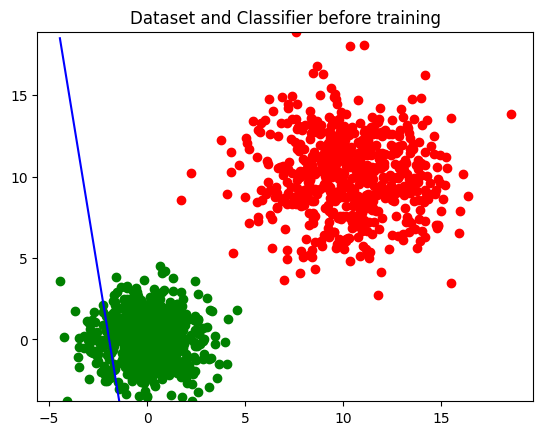

In [175]:
weights = np.random.rand(3)
dataset = generateDataset(10)
plotGraph(dataset,weights,"Dataset and Classifier before training")

#**Training Classifier**

Converged at epoch : 4
Number of iteration taken 25
Weights [  2.90524481   3.27722442 -20.21146512]


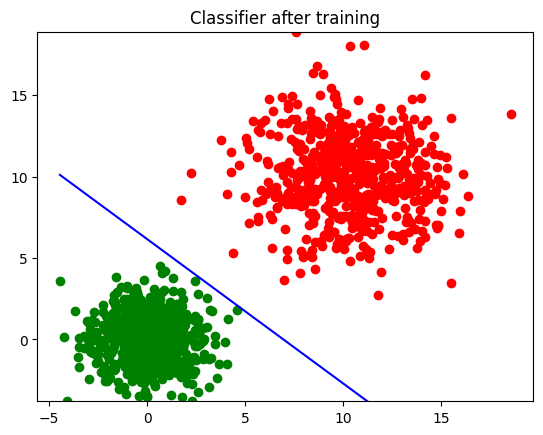

In [176]:
#Training the classifier
w,iter= trainingPerceptron(dataset,10,1e-5,weights)
print("Weights",w)
plotGraph(dataset,w,"Classifier after training")

#**Calculating number of iterations required for perfect classification (k) by varying the level of separability**

In [177]:
gammas = [10,15,20,25,30]
k = []

for gamma in gammas:
  print("For gamma value",gamma)
  total_iter=0

  for i in range(2):
    data = generateDataset(gamma)
    weights = np.zeros(3)
    w,iter= trainingPerceptron(data,5,1e-5,weights)
    # plotGraph(data,w,"a")
    total_iter+=iter

  k.append(total_iter/5)


For gamma value 10
Number of iteration taken 31
Number of iteration taken 37
For gamma value 15
Converged at epoch : 4
Number of iteration taken 28
Converged at epoch : 3
Number of iteration taken 19
For gamma value 20
Converged at epoch : 4
Number of iteration taken 32
Converged at epoch : 2
Number of iteration taken 1
For gamma value 25
Converged at epoch : 3
Number of iteration taken 24
Converged at epoch : 2
Number of iteration taken 7
For gamma value 30
Converged at epoch : 2
Number of iteration taken 7
Converged at epoch : 3
Number of iteration taken 30


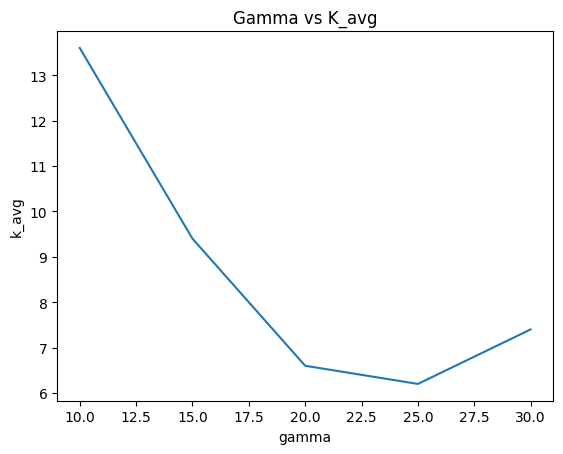

In [178]:
#Plotting gamma vs k_avg plot
plt.title("Gamma vs K_avg")
plt.xlabel("gamma")
plt.ylabel("k_avg")
plt.plot(gammas,k)
plt.show()

**Observation: We can see that as the separability between the two classes increases number of iteration taken decreases, i.e classifier will take less time to train**

#**Q 2: Gradient decent algorithm**

In [179]:
def sigmoid(w,X,b):
  return 1 / (1 + np.exp(-(np.dot(X, w) + b)))

In [180]:
def db(y, y_pred):
    return np.mean(y_pred - y) #Using entropy as loss function, derivative of loss function with respect to bias(b) gives this equation


In [181]:
def dw(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y) #Using entropy as loss function, derivative of loss function with respect to weights(w) gives this equation


In [182]:
#Gradient decent algorithm
def GradientDescent(dataset, l_rate, max_epoch,weights):
    iter_count = 0

    X = dataset[:, [0, 1]]
    y = dataset[:, 2]

    for epoch in range(max_epoch):
        y_pred = sigmoid(weights[:2], X, weights[2])
        weights[:2] -= l_rate * dw(X, y, y_pred)
        weights[2] -= l_rate * db(y, y_pred)
        iter_count += 1

        if np.linalg.norm(dw(X, y, y_pred)) < 1e-10:
            break

    print("Number of iterations taken:", iter_count)
    return weights, iter_count


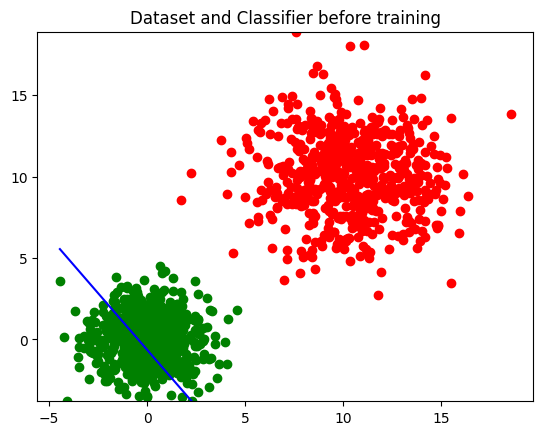

Number of iterations taken: 100


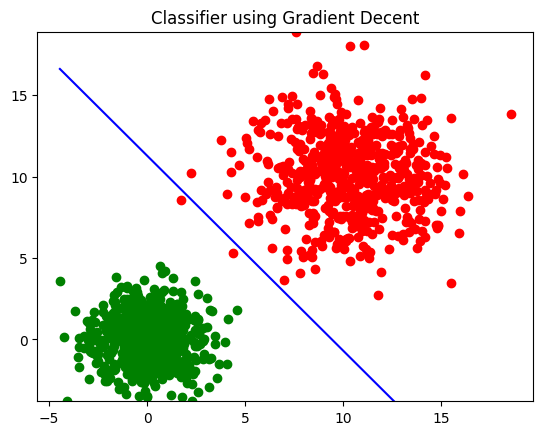

In [183]:
#Training classifier
weig = np.random.rand(3)
plotGraph(dataset,weig,"Dataset and Classifier before training")
weight_gra, iter_gra = GradientDescent(dataset, 0.1, 100,weig)
plotGraph(dataset,weight_gra,"Classifier using Gradient Decent")


#**Q3 MLP with a single hidden layer**


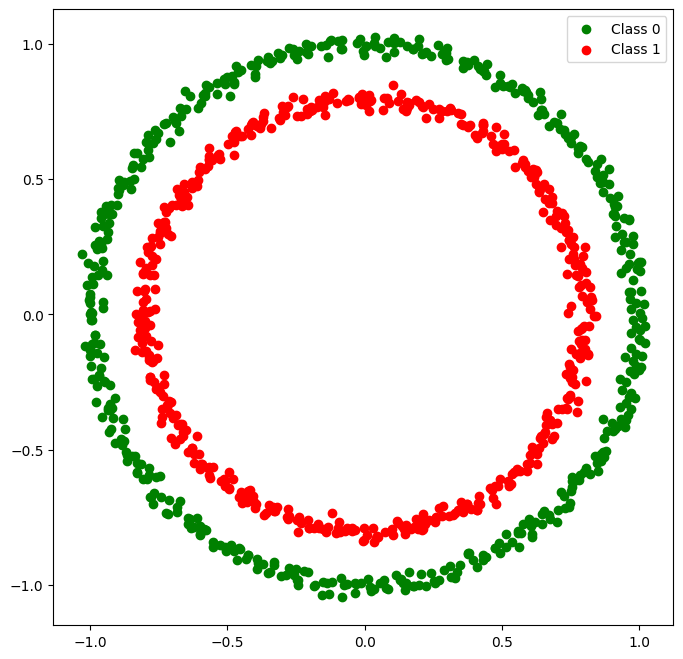

In [184]:
from sklearn.datasets import make_circles

# Create a non-linear dataset with points on the circumference of two concentric circles
X, y = make_circles(n_samples=1000, noise=0.02, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Class 1')
plt.legend()
plt.show()


In [185]:
def sigmoids(x):
    return 1 / (1 + np.exp(-x))

In [186]:
#Derviative of sigmoid
def sigmoid_der(x):
    return sigmoids(x) @ (1 - sigmoids(x)).T

In [187]:
#Loss function
def cross_entropy(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #Used to handle log(0) value
    return np.mean(-(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))


In [188]:
#MLP algorithm
def mlp(X, y, hidden_size, learning_rate, max_epochs):

    #intitalizing random weights
    w1 = np.random.rand(X.shape[1], hidden_size)
    w2 = np.random.rand(hidden_size, 1)
    bias1 = np.zeros((1, hidden_size))
    bias2 = np.zeros((1, 1))

    for epoch in range(max_epochs):

        # Forward propagation
        hidden_ip = np.dot(X, w1) + bias1
        hidden_op = sigmoids(hidden_ip)

        final_input = np.dot(hidden_op, w2) + bias2
        y_pred = sigmoids(final_input)

        # Calculating loss
        loss = np.mean(cross_entropy(y, y_pred))

        if loss<=0.02:
          print(f"Converged Successfuly at epoch {epoch}")

        # Backward propagation
        op_err = np.mean(((y_pred.T - y) @ hidden_op).T)
        op_hidden_err = np.mean((sigmoid_der(hidden_op) @ X).T @ ((y_pred.T - y).T @ w2.T))

        # Updating weights and biases using gradient decent
        w2 -= learning_rate * op_err
        bias2 -= learning_rate * np.sum(op_err, axis=0, keepdims=True)

        w1 -= learning_rate * op_hidden_err
        bias1 -= learning_rate * np.sum(op_hidden_err, axis=0, keepdims=True)

        if(epoch%100==0):
          print(f"Loss after epoch {epoch} :{loss}")

    return w1, w2, bias1, bias2



In [189]:
#Training Neural net
weights_hidden,weights_output, bias_hidden, bias_output = mlp(X, y, 5, 0.001, 5000)


Loss after epoch 0 :0.8125602131654938
Loss after epoch 100 :0.6966239801948377
Loss after epoch 200 :0.6966885931223287
Loss after epoch 300 :0.696716458870045
Loss after epoch 400 :0.6967324189156624
Loss after epoch 500 :0.6967431776041267
Loss after epoch 600 :0.6967510754091082
Loss after epoch 700 :0.6967571028630904
Loss after epoch 800 :0.6967617693358695
Loss after epoch 900 :0.6967653906419717
Loss after epoch 1000 :0.6967681914237039
Loss after epoch 1100 :0.6967703439970804
Loss after epoch 1200 :0.696771984818503
Loss after epoch 1300 :0.696773222973449
Loss after epoch 1400 :0.6967741456846708
Loss after epoch 1500 :0.6967748225094618
Loss after epoch 1600 :0.6967753087599616
Loss after epoch 1700 :0.6967756483255597
Loss after epoch 1800 :0.6967758759834272
Loss after epoch 1900 :0.6967760192665462
Loss after epoch 2000 :0.6967760999573768
Loss after epoch 2100 :0.6967761352727142
Loss after epoch 2200 :0.6967761387991948
Loss after epoch 2300 :0.6967761212305489
Loss af

In [190]:
print(f"weight of hidden layer 1 {weights_hidden}")
print(f"weight of hidden layer 2 {weights_output}")

weight of hidden layer 1 [[251.38761061 251.20941268 250.68802409 251.07968738 250.68232273]
 [251.22261768 251.15819897 250.77200508 250.78794618 251.2192091 ]]
weight of hidden layer 2 [[-0.17761087]
 [ 0.01823457]
 [-0.20689118]
 [ 0.25143689]
 [ 0.53523736]]
